In [1]:
# install imp. libraries
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [5]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [6]:
# Load the data
file_path = 'processed_EDA_Loan.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
  Customer ID               Name Gender  Age  Income (USD) Income Stability  \
0     C-36995   Frederica Shealy      F   56       1933.05              Low   
1     C-33999  America Calderone      M   32       4952.91              Low   
2      C-3770      Rosetta Verne      F   65        988.19             High   
3     C-26480         Zoe Chitty      F   65           NaN             High   
4     C-23459       Afton Venema      F   31       2614.77              Low   

  Profession     Type of Employment    Location  Loan Amount Request (USD)  \
0    Working            Sales staff  Semi-Urban                   72809.58   
1    Working                    NaN  Semi-Urban                   46837.47   
2  Pensioner                    NaN  Semi-Urban                   45593.04   
3  Pensioner                    NaN       Rural                   80057.92   
4    Working  High skill tech staff  Semi-Urban                  113858.89   

   ...  Credit Score No. 

In [7]:
#  Select numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

In [8]:
# Correlation Matrix
correlation_matrix = data[numerical_columns].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                                  Age  Income (USD)  \
Age                          1.000000     -0.042338   
Income (USD)                -0.042338      1.000000   
Loan Amount Request (USD)   -0.009638      0.316619   
Current Loan Expenses (USD) -0.026067      0.390381   
Dependents                  -0.084117     -0.007934   
Credit Score                 0.129760      0.070903   
No. of Defaults                   NaN           NaN   
Property ID                 -0.012358     -0.010389   
Property Age                -0.042794      0.999595   
Property Type                0.002196      0.006817   
Co-Applicant                      NaN           NaN   
Property Price              -0.011431      0.293796   
Loan Sanction Amount (USD)   0.010809      0.206967   

                             Loan Amount Request (USD)  \
Age                                          -0.009638   
Income (USD)                                  0.316619   
Loan Amount Request (USD)         

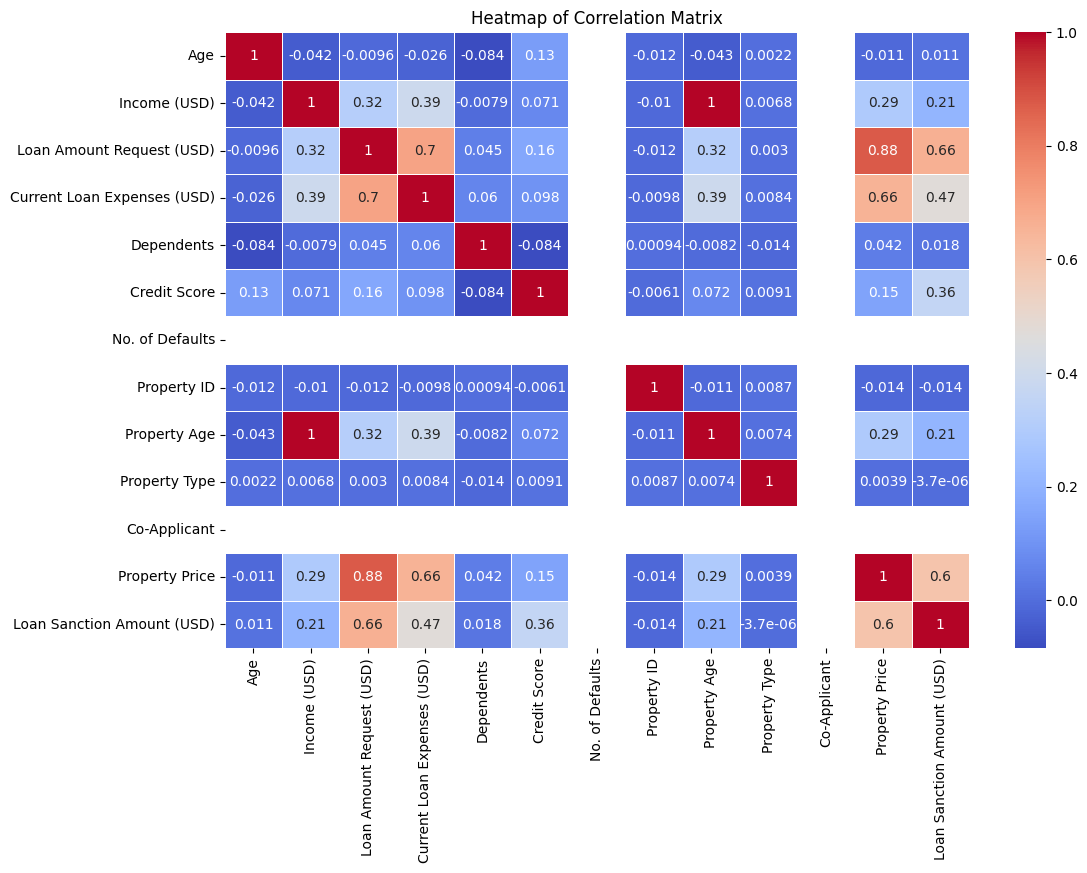

In [9]:
# Heatmap of the Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

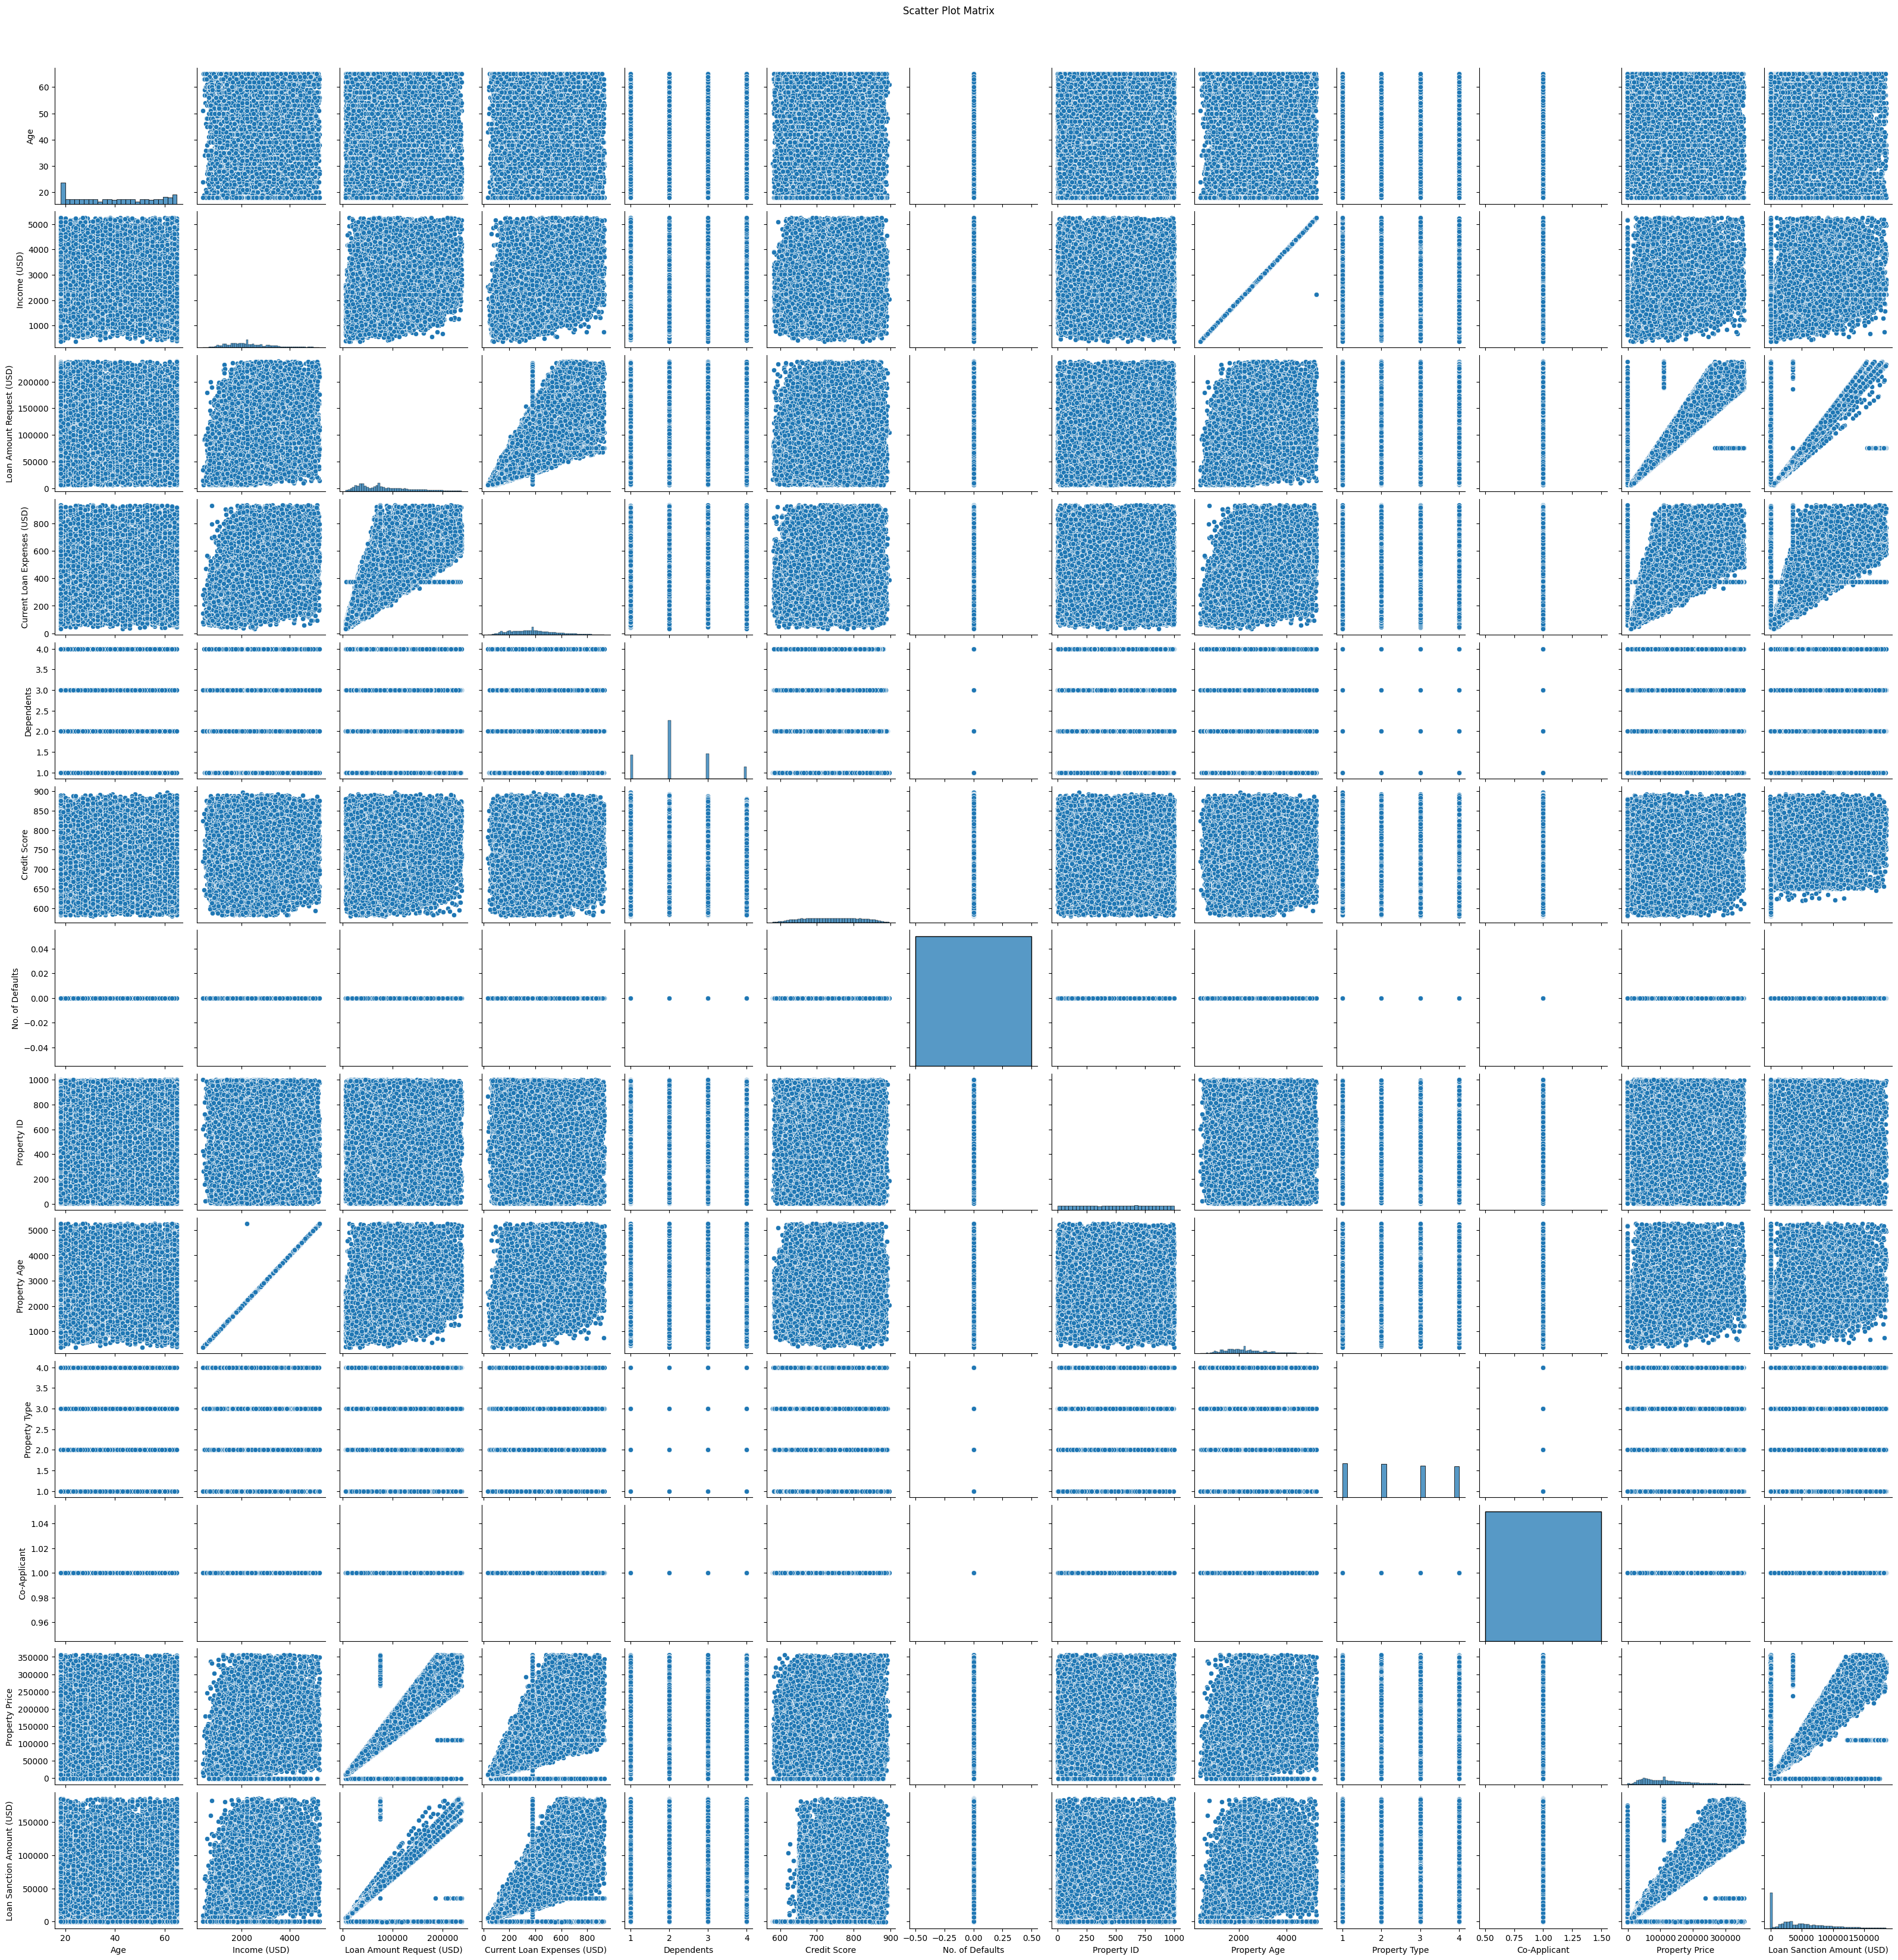

In [10]:
# Scatter Plot Matrix (Pair Plot)
sns.pairplot(data[numerical_columns])
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

In [11]:
# Principal Component Analysis (PCA)
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_result = pca.fit_transform(data[numerical_columns].dropna())
pca_df = pd.DataFrame(data=pca_result, columns=['Principal Component 1', 'Principal Component 2'])


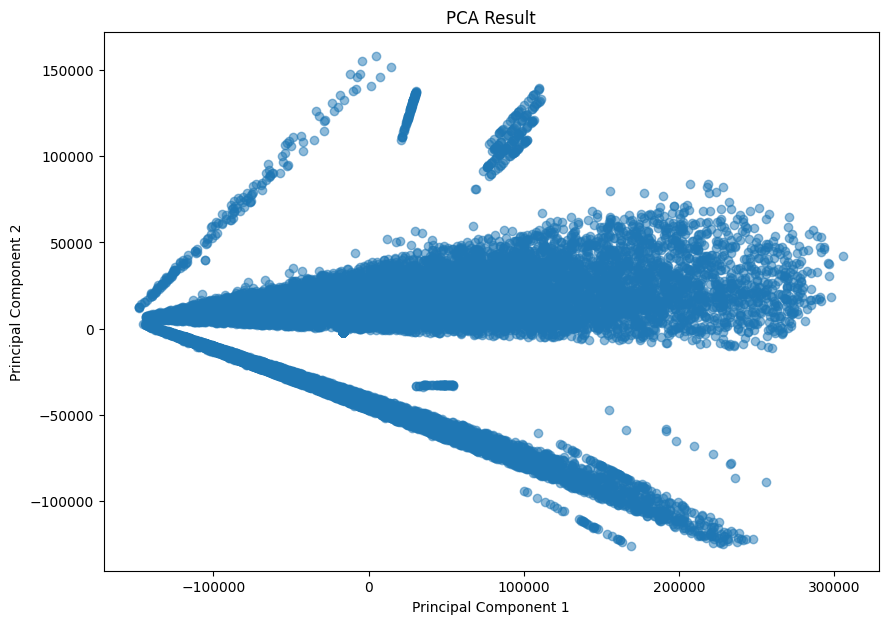

In [12]:
# Scatter Plot of PCA Result
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.5)
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()